# Mobile Data Challenge 2024
## Notebook de prova

En aquest challenge treballareu amb un gran dataset real i pot ser que mai hagueu treballat amb dades mitjançant codi. Us proporcionem un dataset de mostra similar a una extracció del que rebreu per part de Telefónica, amb dades aleatòries per l'objectiu de que dugueu a terme les següents activitats simples a partir d'elles. Les dades proporcionades són fictícies i només pel propòsit de simular unes activitats bàsiques, qualsevol similitud amb la realitat es només una coincidència. Els resultats que obtingueu poden no tenir sentit.

El dataset es composa d'un CSV amb 6 columnes: 
1. Dia al que es refereix la medició (format DD/MM/AAAA)
2. Nom de la província d'origen
3. Nom de la província de destí
4. Dia de la setmana
5. Mes
6. Número de conexions mòbils desplaçades d'origen a destí (nº de viatges)

Per a que el notebook funcioni, el dataset s'ha de trobar al mateix directori que el notebook i sota el nom original "testdata.csv". Si heu canviat el nom del CSV, canvieu-lo també a la línea de codi del file_path que trobareu a sota.

In [1]:
# Installs and imports
%pip install pandas
%pip install matplotlib
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Path to the CSV file (CSV SHOULD BE INSIDE SAME DIRECTORY AS NOTEBOOK)
file_path = 'testdata.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path, delimiter=';')

In [3]:
# Print columns for making sure read_csv worked
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Day                     123 non-null    object
 1   Provincia Origen Name   123 non-null    object
 2   Provincia Destino Name  123 non-null    object
 3   Day Of Week             123 non-null    object
 4   Month                   123 non-null    object
 5   Viajes                  123 non-null    int64 
dtypes: int64(1), object(5)
memory usage: 5.9+ KB
None


Amb aquest dataset, per exemple ens agradaria obtenir les dades de quanta gent de fora ha vingut a Catalunya la 3a setmana d'agost (dies 19-25).

Per això hem de filtrar aquelles entrades en les quals l'origen sigui alguna província de Catalunya (Barcelona, Girona, Lleida i Tarragona):

In [4]:
# List of provinces to discard
provinces_to_discard = ['Barcelona', 'Girona', 'Tarragona', 'Lleida']

# Filter the DataFrame
filtered_df_origin_nocat = df[~df['Provincia Origen Name'].isin(provinces_to_discard)]

# Convert the filtered DataFrame to a list of dictionaries
filtered_list_origin_nocat = filtered_df_origin_nocat.to_dict('records')

print(filtered_list_origin_nocat)

[{'Day': '01/05/2024', 'Provincia Origen Name': 'Madrid', 'Provincia Destino Name': 'Girona', 'Day Of Week': 'Sábado', 'Month': 'Mayo', 'Viajes': 27050}, {'Day': '03/05/2024', 'Provincia Origen Name': 'Valencia', 'Provincia Destino Name': 'Barcelona', 'Day Of Week': 'Martes', 'Month': 'Mayo', 'Viajes': 2980}, {'Day': '04/05/2024', 'Provincia Origen Name': 'Sevilla', 'Provincia Destino Name': 'Lérida', 'Day Of Week': 'Viernes', 'Month': 'Mayo', 'Viajes': 4123}, {'Day': '05/05/2024', 'Provincia Origen Name': 'Zaragoza', 'Provincia Destino Name': 'Málaga', 'Day Of Week': 'Miércoles', 'Month': 'Mayo', 'Viajes': 1865}, {'Day': '06/05/2024', 'Provincia Origen Name': 'Málaga', 'Provincia Destino Name': 'Cádiz', 'Day Of Week': 'Jueves', 'Month': 'Mayo', 'Viajes': 2450}, {'Day': '07/05/2024', 'Provincia Origen Name': 'Murcia', 'Provincia Destino Name': 'Girona', 'Day Of Week': 'Domingo', 'Month': 'Mayo', 'Viajes': 47890}, {'Day': '08/05/2024', 'Provincia Origen Name': 'Alicante', 'Provincia Des

Ara, hauriem de filtrar les entrades d'aquesta nova llista que tinguin com a província destí una província de Catalunya:

In [5]:
# Filter the list
filtered_list_dest_cat = [entry for entry in filtered_list_origin_nocat if entry['Provincia Destino Name'] in provinces_to_discard]

print(filtered_list_dest_cat)

[{'Day': '01/05/2024', 'Provincia Origen Name': 'Madrid', 'Provincia Destino Name': 'Girona', 'Day Of Week': 'Sábado', 'Month': 'Mayo', 'Viajes': 27050}, {'Day': '03/05/2024', 'Provincia Origen Name': 'Valencia', 'Provincia Destino Name': 'Barcelona', 'Day Of Week': 'Martes', 'Month': 'Mayo', 'Viajes': 2980}, {'Day': '07/05/2024', 'Provincia Origen Name': 'Murcia', 'Provincia Destino Name': 'Girona', 'Day Of Week': 'Domingo', 'Month': 'Mayo', 'Viajes': 47890}, {'Day': '15/05/2024', 'Provincia Origen Name': 'La Coruña', 'Provincia Destino Name': 'Tarragona', 'Day Of Week': 'Jueves', 'Month': 'Mayo', 'Viajes': 18900}, {'Day': '19/05/2024', 'Provincia Origen Name': 'Albacete', 'Provincia Destino Name': 'Tarragona', 'Day Of Week': 'Domingo', 'Month': 'Mayo', 'Viajes': 28700}, {'Day': '21/05/2024', 'Provincia Origen Name': 'Cuenca', 'Provincia Destino Name': 'Barcelona', 'Day Of Week': 'Viernes', 'Month': 'Mayo', 'Viajes': 21500}, {'Day': '24/05/2024', 'Provincia Origen Name': 'Segovia', 'P

Obtenim les entrades que corresponguin a la 3a setmana d'agost (del 19 al 25):

In [6]:
# Filter the list for entries with 'Month' being 'Agosto'
filtered_list_august = [entry for entry in filtered_list_dest_cat if entry['Month'] == 'Agosto']

print("Entries on august: ", filtered_list_august)

# Select the entries for the specified dates
selected_dates = ['19/08/2024', '20/08/2024', '21/08/2024', '22/08/2024', '23/08/2024', '24/08/2024', '25/08/2024']
filtered_list_august_week3 = [entry for entry in filtered_list_august if entry['Day'] in selected_dates]

print("Entries between 19 and 25th of august: ", filtered_list_august_week3)

Entries on august:  [{'Day': '04/08/2024', 'Provincia Origen Name': 'Sevilla', 'Provincia Destino Name': 'Tarragona', 'Day Of Week': 'Miércoles', 'Month': 'Agosto', 'Viajes': 3000}, {'Day': '06/08/2024', 'Provincia Origen Name': 'Málaga', 'Provincia Destino Name': 'Girona', 'Day Of Week': 'Domingo', 'Month': 'Agosto', 'Viajes': 44500}, {'Day': '07/08/2024', 'Provincia Origen Name': 'Murcia', 'Provincia Destino Name': 'Tarragona', 'Day Of Week': 'Martes', 'Month': 'Agosto', 'Viajes': 13400}, {'Day': '08/08/2024', 'Provincia Origen Name': 'Alicante', 'Provincia Destino Name': 'Barcelona', 'Day Of Week': 'Sábado', 'Month': 'Agosto', 'Viajes': 17800}, {'Day': '12/08/2024', 'Provincia Origen Name': 'Salamanca', 'Provincia Destino Name': 'Girona', 'Day Of Week': 'Miércoles', 'Month': 'Agosto', 'Viajes': 17200}, {'Day': '20/08/2024', 'Provincia Origen Name': 'Ciudad Real', 'Provincia Destino Name': 'Tarragona', 'Day Of Week': 'Viernes', 'Month': 'Agosto', 'Viajes': 36780}, {'Day': '24/08/2024

Ara amb això podem fer un gràfic de quanta gent ha viatjat de la resta d'Espanya a Catalunya la 3a setmana d'agost:

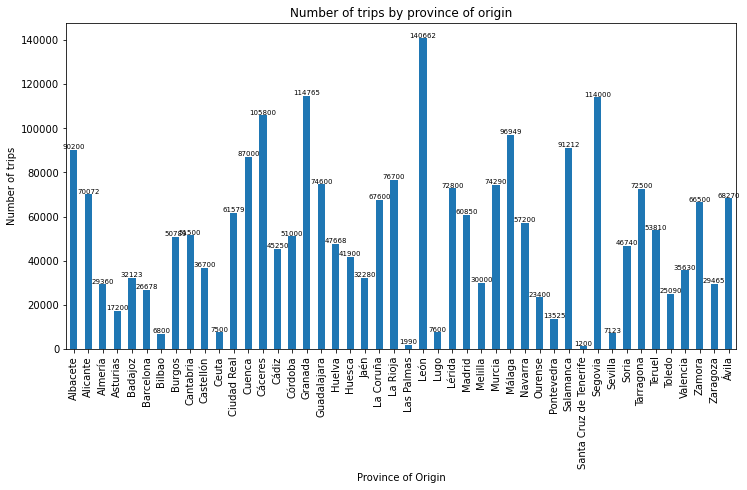

In [7]:

# Count the number of entries for each province of origin
day_counts = df['Provincia Origen Name'].value_counts()

# Sum the values of column 'Viajes' by 'Provincia Origen Name'
viajes_sum = df.groupby('Provincia Origen Name')['Viajes'].sum()

# Plot the bar graph
viajes_sum.plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Number of trips by province of origin')
plt.xlabel('Province of Origin')
plt.ylabel('Number of trips')

# Annotate the bar graph with the values (optional)
for index, value in enumerate(viajes_sum):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=7)

# Show the plot
plt.show()

El podem mostrar ordenat per veure clarament de quines províncies ha vingut més gent:

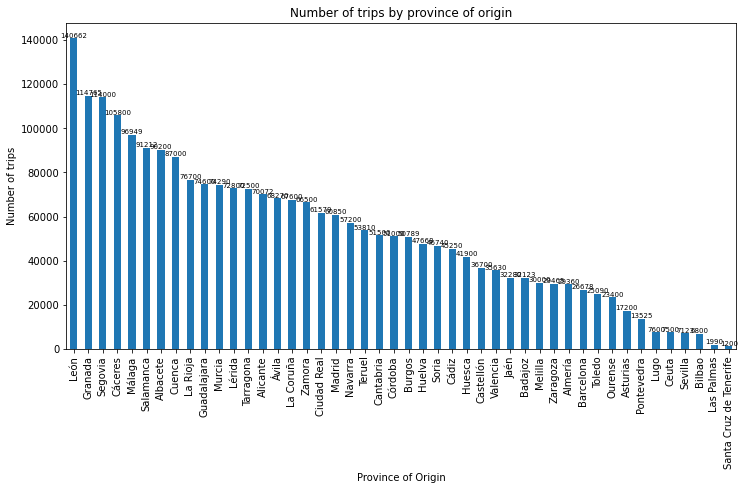

In [8]:
# Sort the series by the number of trips
viajes_sum_sorted = viajes_sum.sort_values(ascending=False)

# Plot the sorted bar graph
viajes_sum_sorted.plot(kind='bar', figsize=(12, 6))

# Add title and labels
plt.title('Number of trips by province of origin')
plt.xlabel('Province of Origin')
plt.ylabel('Number of trips')

# Annotate the bar graph with the values (optional)
for index, value in enumerate(viajes_sum_sorted):
    plt.text(index, value, str(value), ha='center', va='bottom', fontsize=7)

# Show the plot
plt.show()

Això és només un exemple de sortida que es pot obtenir treballant amb un dataset similar al que se us proporcionarà. Les possibilitats son moltes i estem segurs que en treureu profit!